## quick pytorch notes

In [1]:
import torch
import numpy as np
print(torch)

<module 'torch' from '/Users/agastyapatel/opt/miniconda3/envs/fastai-311/lib/python3.11/site-packages/torch/__init__.py'>


In [2]:
data = [[1,2],
        [3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [3]:
# from numpy
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [7]:
# from ones
x_ones = torch.ones_like(x_data)
x_ones

tensor([[1, 1],
        [1, 1]])

In [6]:
# from random
x_rand = torch.rand_like(x_data, dtype = torch.float)
x_rand

tensor([[0.5933, 0.7793],
        [0.3975, 0.3947]])

In [9]:
# shape is a tuple for the tensor dimensions
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
rand_tensor, ones_tensor, zeros_tensor

(tensor([[0.8979, 0.9019, 0.1975],
         [0.4756, 0.3772, 0.8873]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[0., 0., 0.],
         [0., 0., 0.]]))

## Tensor Attributes

In [10]:
x_data.shape

torch.Size([2, 2])

In [12]:
x_data.dtype

torch.int64

In [14]:
x_data.device

device(type='cpu')

## Tensor Operations

In [15]:
if torch.cuda.is_available():
    x_data = x_data.to('cuda')
x_data.device

device(type='cpu')

In [16]:
# ARM Silicon mac
if torch.backends.mps.is_available():
    print('mps device available')

mps device available


In [26]:
tensor = torch.ones(4,4)
tensor[:, 1] = 0
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

### Joining Tensors

In [34]:
# Concatenation is used for joining tensor in existing dimmensions
t1 = torch.tensor([1, 2, 3])
t2 = torch.tensor([4, 5, 6])
result = torch.cat((t1, t2), dim=0)
result

tensor([1, 2, 3, 4, 5, 6])

In [35]:
# concatenation
t = torch.cat([tensor, tensor, tensor])
print(t, t.shape)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) torch.Size([12, 4])


In [38]:
# stacking is used for joining tensor in new dimmensions
result_row_stack = torch.stack((t1, t2), dim=0)  # stacking row by row
result_col_stack = torch.stack((t1, t2), dim=1)  # stacking col by col
result_row_stack, result_col_stack

(tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[1, 4],
         [2, 5],
         [3, 6]]))

In [42]:
# stacking
t = torch.stack([tensor, tensor, tensor], dim=0)
t,  t.shape

(tensor([[[1., 0., 1., 1.],
          [1., 0., 1., 1.],
          [1., 0., 1., 1.],
          [1., 0., 1., 1.]],
 
         [[1., 0., 1., 1.],
          [1., 0., 1., 1.],
          [1., 0., 1., 1.],
          [1., 0., 1., 1.]],
 
         [[1., 0., 1., 1.],
          [1., 0., 1., 1.],
          [1., 0., 1., 1.],
          [1., 0., 1., 1.]]]),
 torch.Size([3, 4, 4]))

> Above you can observe that new dimmension has been added that's the outer most dimmension

In [43]:
# stacking to create new dimmension in middle
t = torch.stack([tensor, tensor, tensor], dim=1)
t, t.shape

(tensor([[[1., 0., 1., 1.],
          [1., 0., 1., 1.],
          [1., 0., 1., 1.]],
 
         [[1., 0., 1., 1.],
          [1., 0., 1., 1.],
          [1., 0., 1., 1.]],
 
         [[1., 0., 1., 1.],
          [1., 0., 1., 1.],
          [1., 0., 1., 1.]],
 
         [[1., 0., 1., 1.],
          [1., 0., 1., 1.],
          [1., 0., 1., 1.]]]),
 torch.Size([4, 3, 4]))

In [44]:
# Tensor multiplication
tensor.mul(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

### Priority of tensor multiplication

1. Scalar Multiplication (Matrix/Vector & scalor value)
2. Elementwise Multiplication (Matrix and Vector)
3. Matrix Multiplication (matrix and matrix)
    - 3A. Elementwise Matrix Multiplicaton
    - 3B. Dot Product

Read the matrix multiplication notes
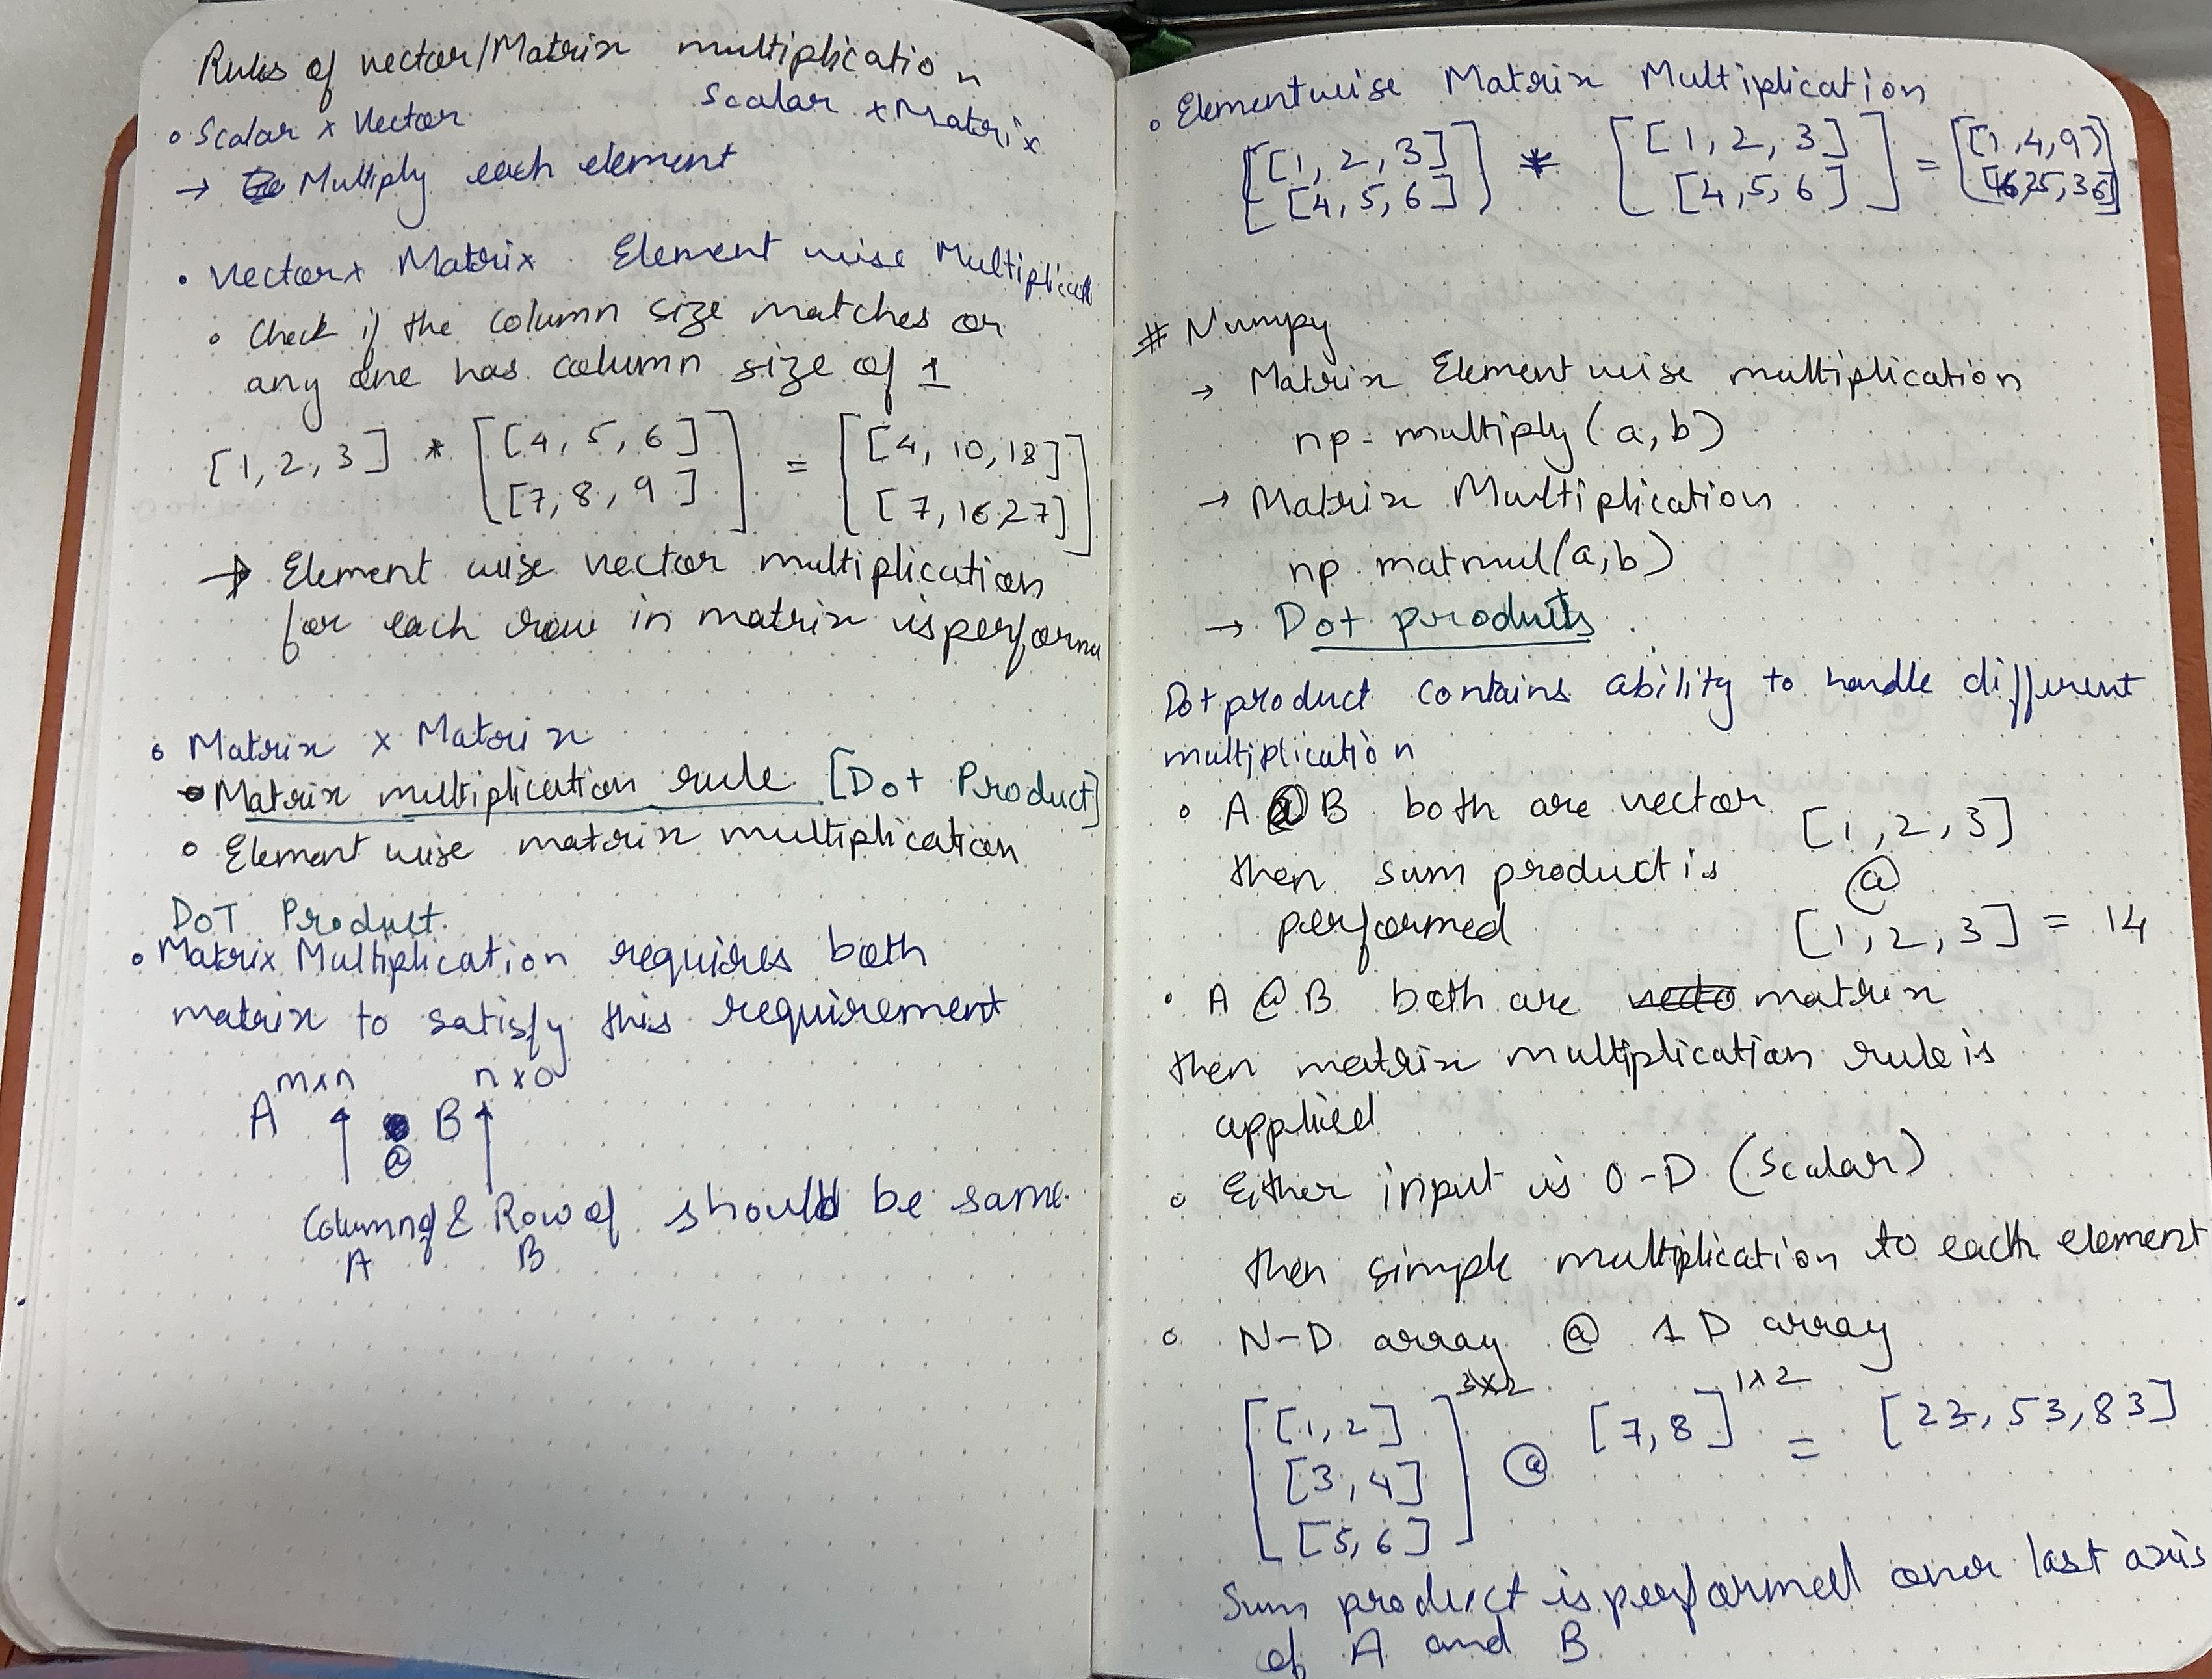
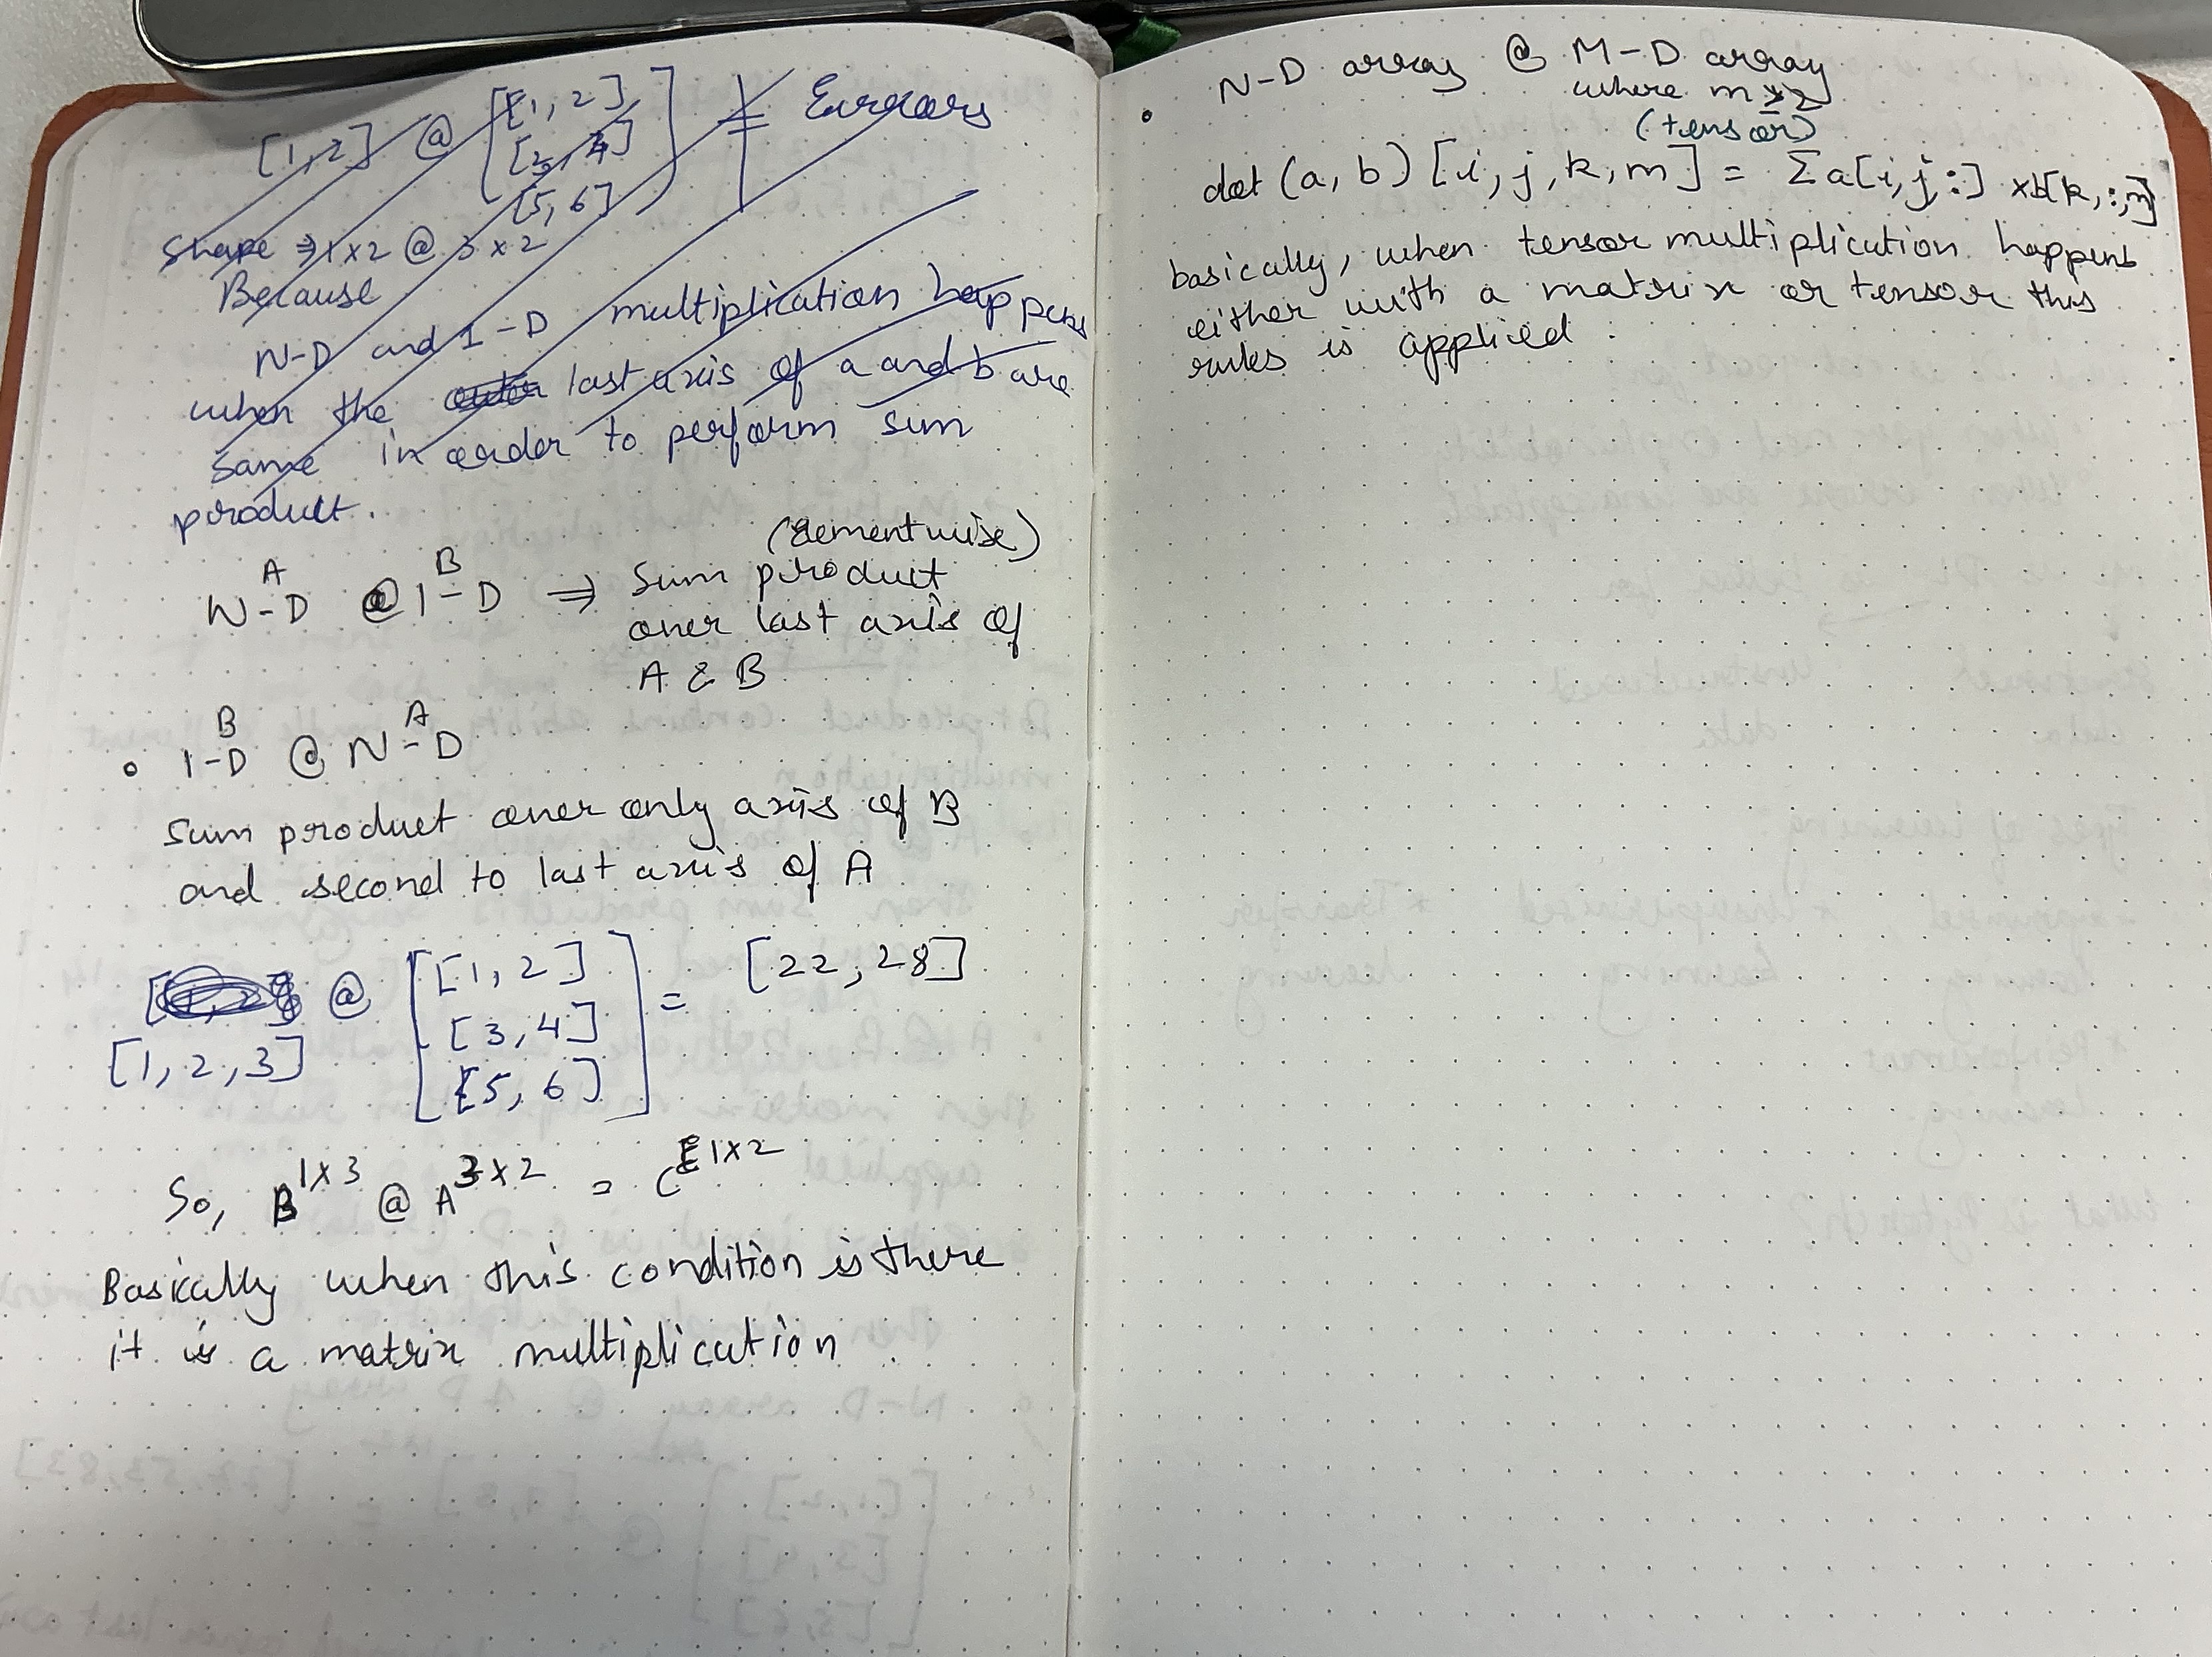

In [45]:
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [51]:
# Elementwise multiplication
tensor * tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [52]:
# Matrix multiplication
tensor.matmul(tensor)

tensor([[3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]])

In [54]:
# Matrix multiplication & transform
tensor.matmul(tensor.T)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

## Bridge with Numpy

In [55]:
## Numpy array to tensors
n = np.ones(5)
t = torch.from_numpy(n)
t

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [56]:
t.add_(1)

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

In [57]:
t

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

In [58]:
t.numpy()

array([2., 2., 2., 2., 2.])